<a href="https://colab.research.google.com/github/larasauser/master/blob/main/image_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 88.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/tmp/ipython-input-975869235.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdYlGn").copy()


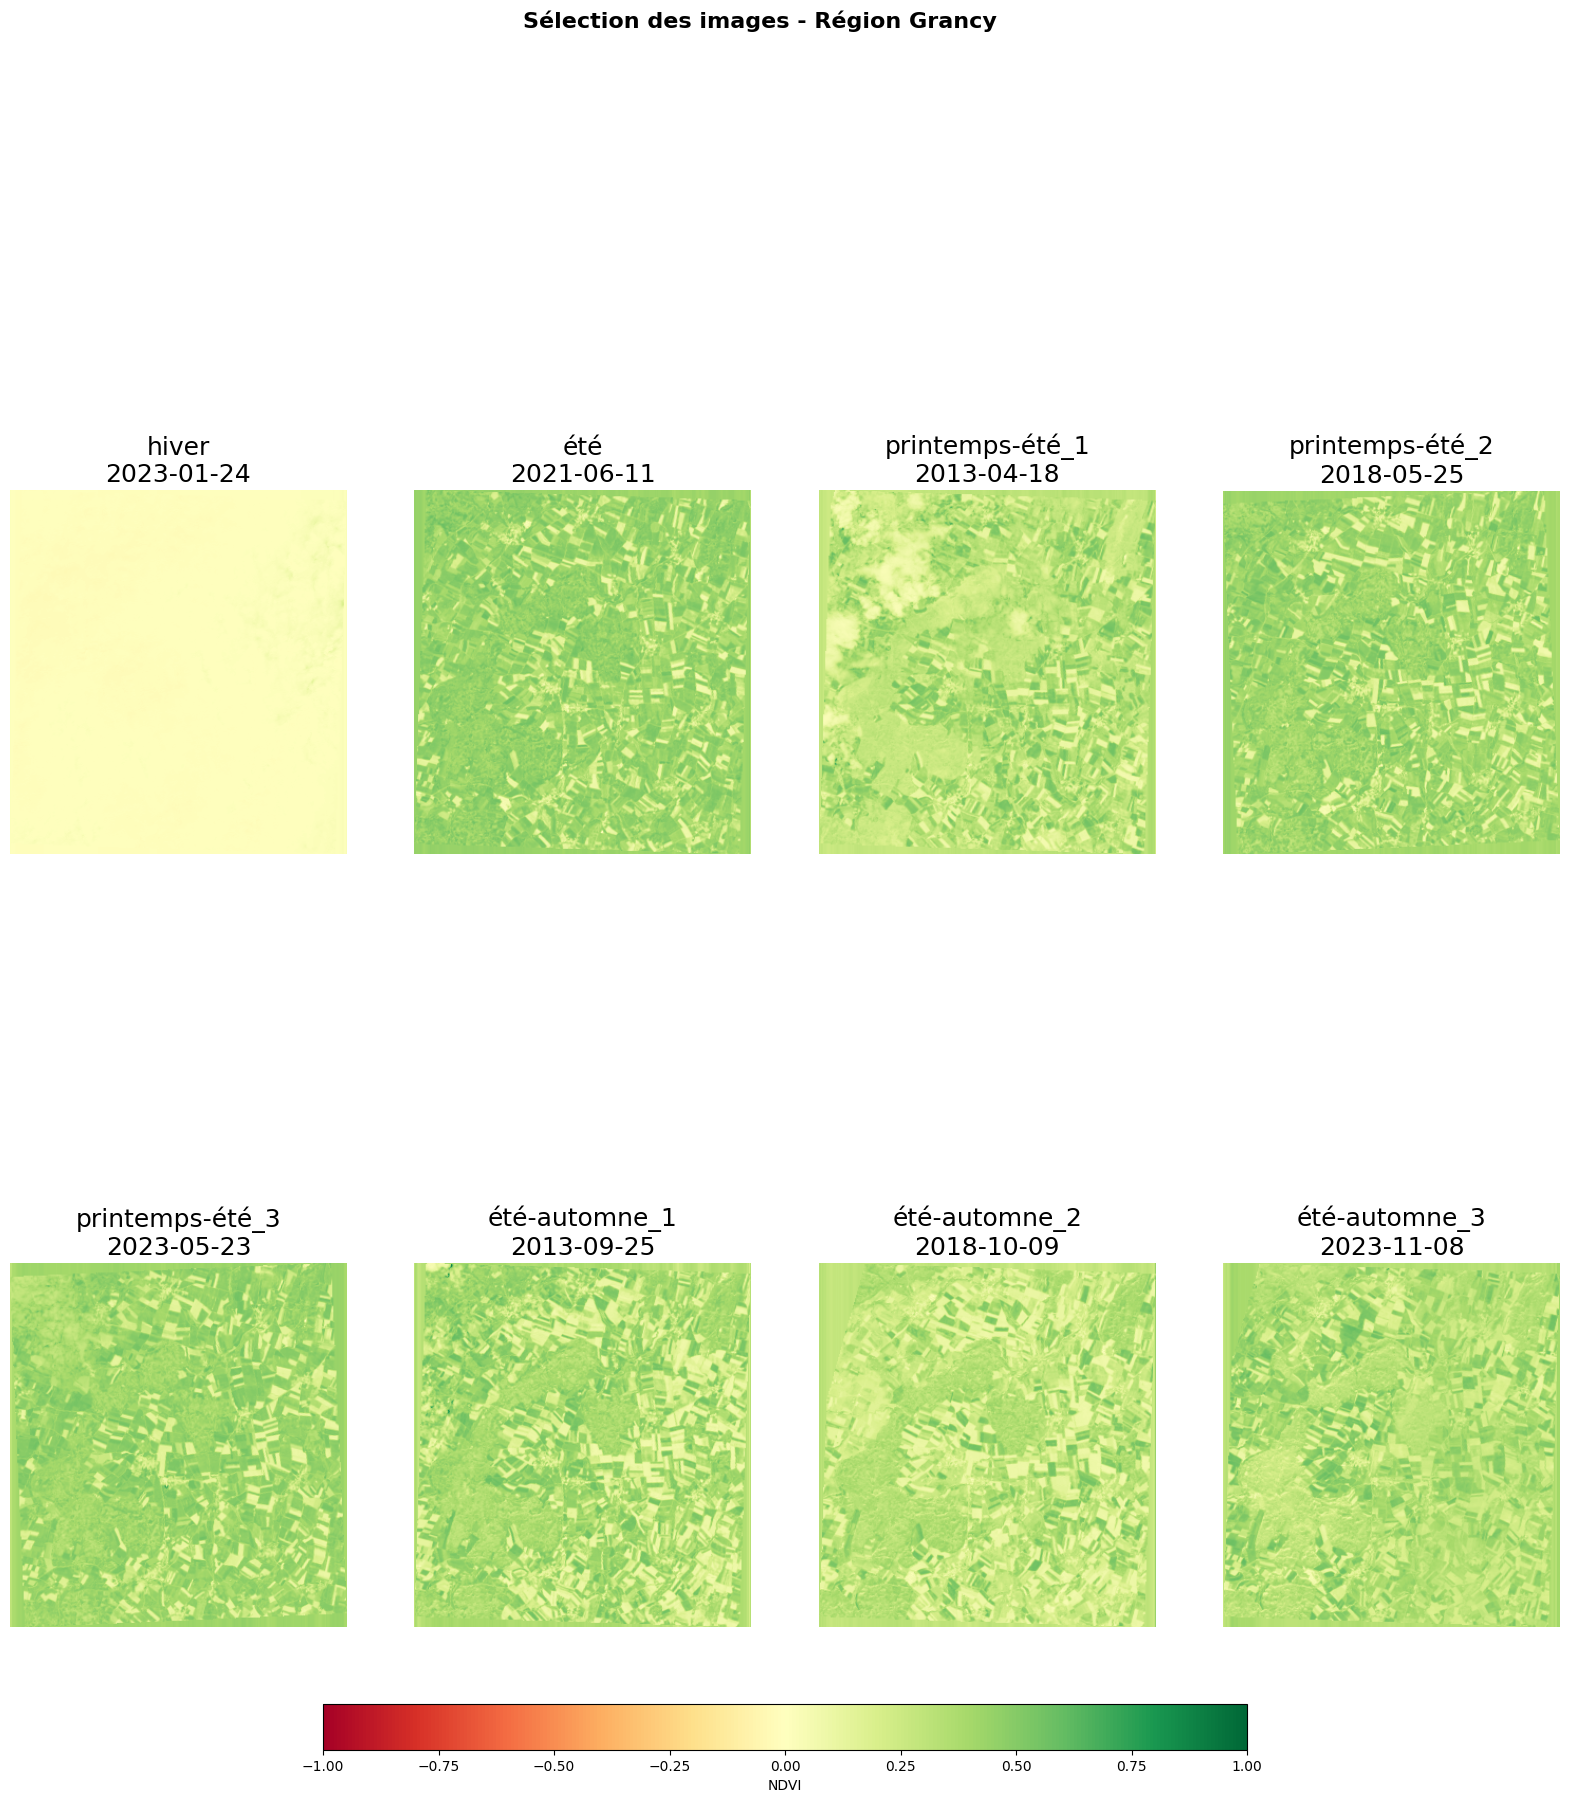

In [25]:
import os
import glob
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import savgol_filter

# ---- PARAMÈTRES ----
image_dir = "/content/drive/MyDrive/NDVI_grancy_Landsat8_10/imputed"
region_name = "Grancy"

# ---- Fonction pour calculer la moyenne NDVI (pas d'AOI) ----
def compute_mean_ndvi(image_path):
    with rasterio.open(image_path) as src:
        arr = src.read(1).astype(float)
        arr[arr <= -9999] = np.nan
        return np.nanmean(arr), src

# ---- Construire la série temporelle ----
records = []
for tif in sorted(glob.glob(os.path.join(image_dir, "*.tif"))):
    ndvi_mean, src = compute_mean_ndvi(tif)
    basename = os.path.basename(tif)
    date_str = basename.split("_")[-1].replace(".tif", "")
    date = pd.to_datetime(date_str)
    records.append({"date": date, "ndvi": ndvi_mean, "path": tif})

df = pd.DataFrame(records).sort_values("date").set_index("date")

# ---- Sélection des images ----
def select_season_images(df):
    hiver = df["ndvi"].idxmin()
    ete = df["ndvi"].idxmax()
    pe = df[(df.index.month>=3)&(df.index.month<=5)]
    ea = df[(df.index.month>=9)&(df.index.month<=11)]

    def median_three(df_subset):
        n = len(df_subset)
        if n == 0:
            return [None, None, None]
        elif n == 1:
            return [df_subset.index[0], None, None]
        elif n == 2:
            return [df_subset.index[0], df_subset.index[1], None]
        else:
            idxs = [0, n//2, n-1]
            return [df_subset.index[i] for i in idxs]

    pe_dates = median_three(pe)
    ea_dates = median_three(ea)

    return {
        "hiver": hiver,
        "été": ete,
        "printemps-été_1": pe_dates[0],
        "printemps-été_2": pe_dates[1],
        "printemps-été_3": pe_dates[2],
        "été-automne_1": ea_dates[0],
        "été-automne_2": ea_dates[1],
        "été-automne_3": ea_dates[2]
    }

selected_dates = select_season_images(df)

# ---- Affichage ----
cmap = cm.get_cmap("RdYlGn").copy()
cmap.set_bad(color="black")

fig, axes = plt.subplots(2, 4, figsize=(20, 20))
axes = axes.ravel()

for ax, (label, date) in zip(axes, selected_dates.items()):
    if date is None:
        ax.set_title(f"{label} (None)")
        ax.axis("off")
        continue

    row = df.loc[date]
    path = row["path"]

    with rasterio.open(path) as src:
        img = src.read(1).astype(float)
        img[img <= -9999] = np.nan
        bounds = src.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

        im = ax.imshow(img, cmap=cmap, vmin=-1, vmax=1, extent=extent)
        ax.set_title(f"{label}\n{date.date()}", fontsize=18)
        ax.axis("off")

fig.suptitle(f"Sélection des images - Région {region_name}", fontsize=16, fontweight="bold")
fig.colorbar(im, ax=axes, orientation="horizontal", fraction=0.03, pad=0.05, label="NDVI")
plt.show()


/tmp/ipython-input-2655152649.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdYlGn").copy()


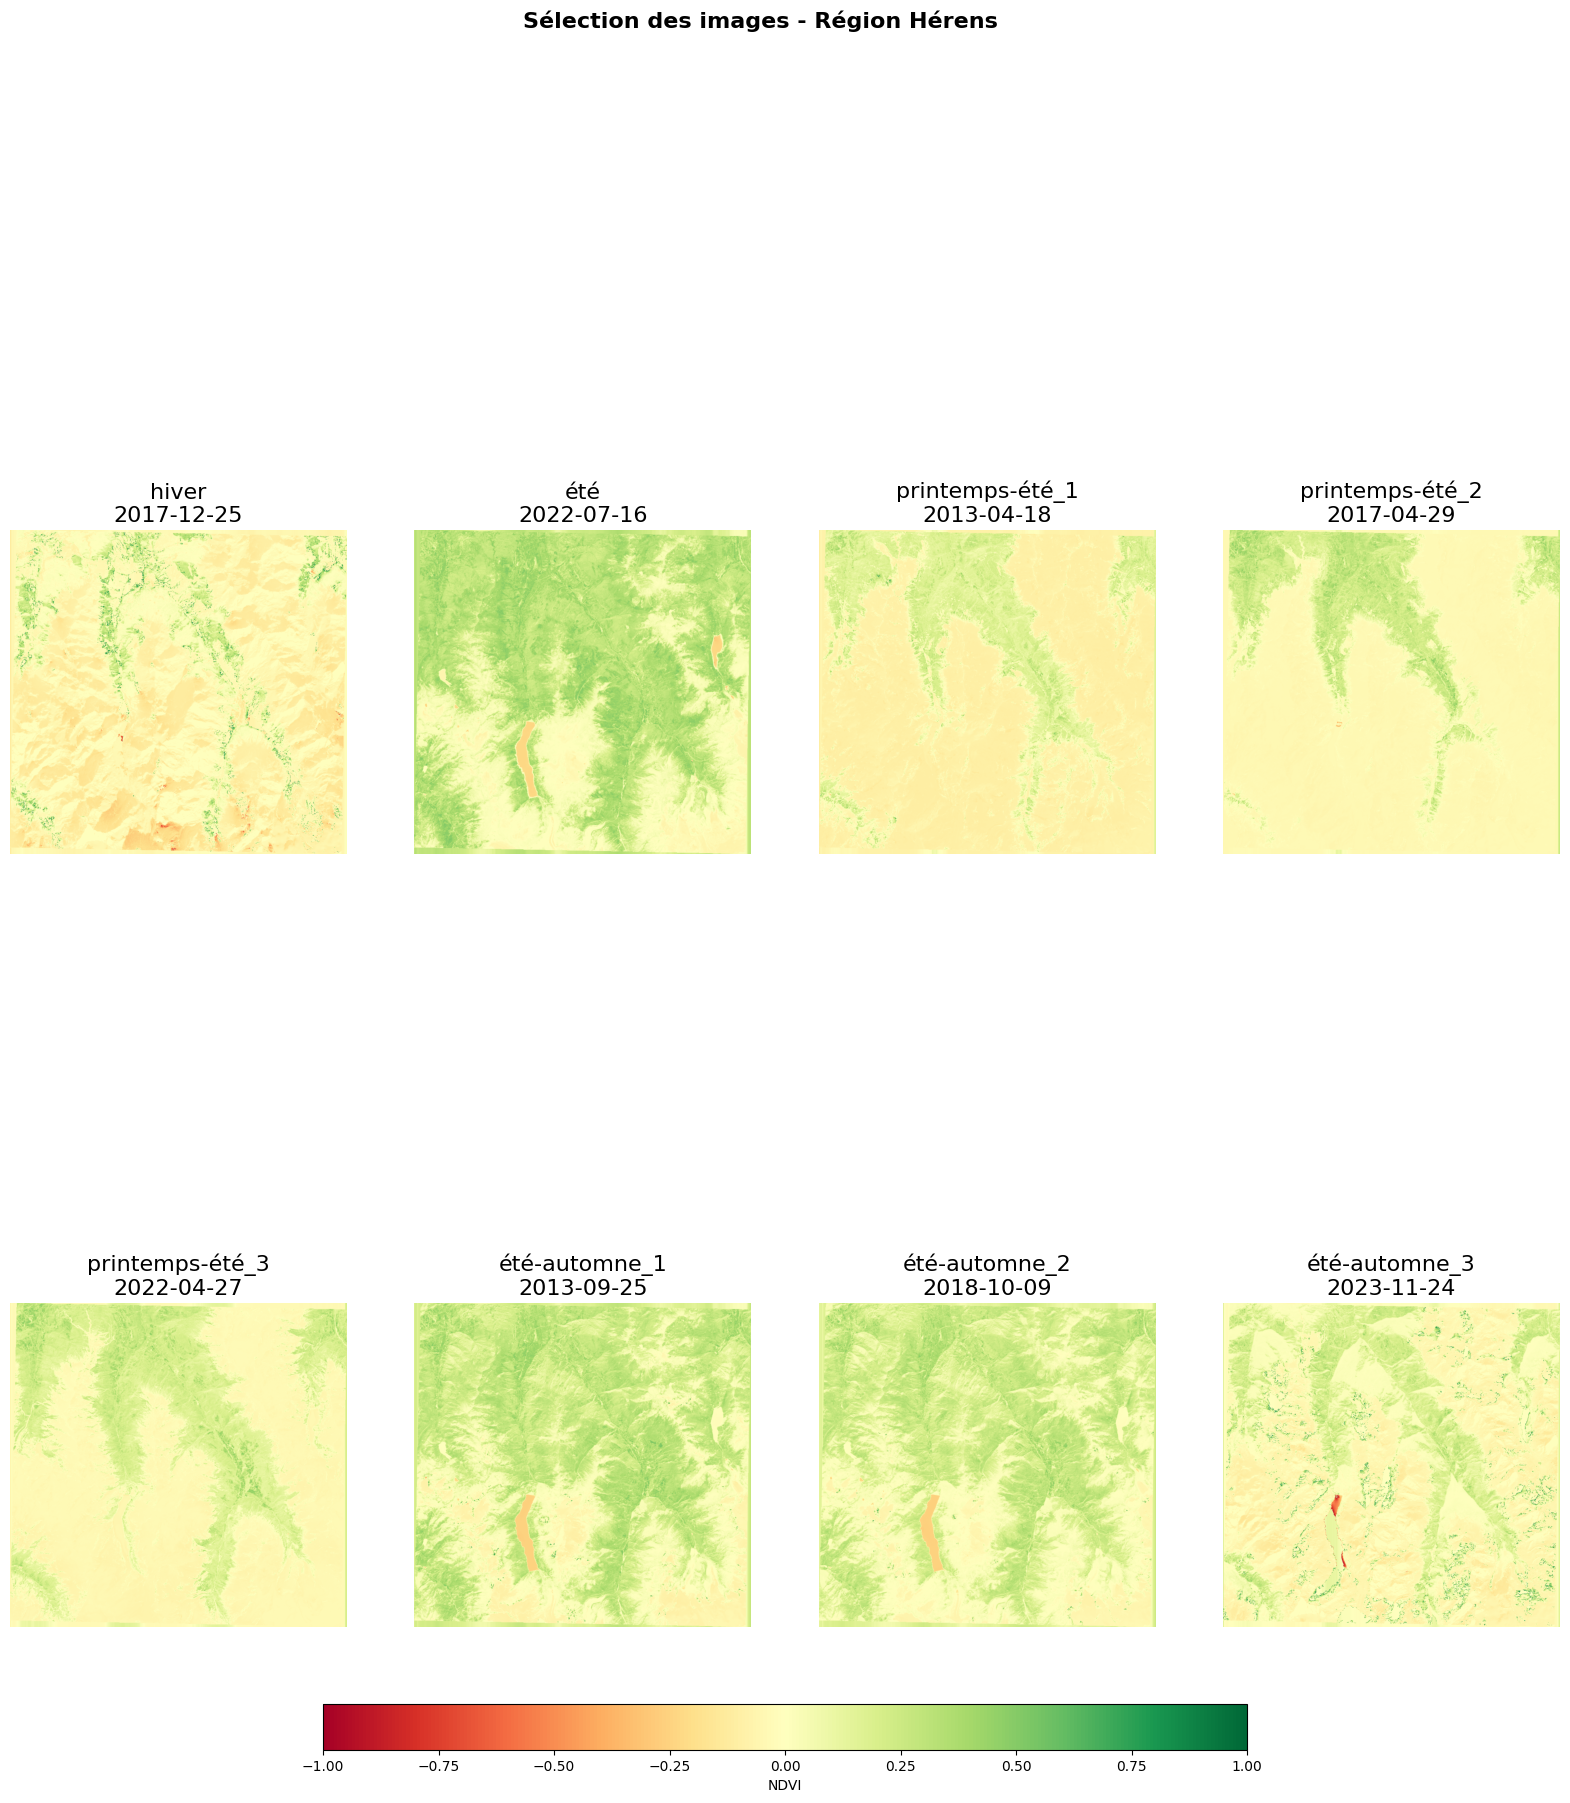

In [28]:
import os
import glob
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import savgol_filter

# ---- PARAMÈTRES ----
image_dir = "/content/drive/MyDrive/NDVI_herens_Landsat8_10/imputed"
region_name = "Hérens"

# ---- Fonction pour calculer la moyenne NDVI (pas d'AOI) ----
def compute_mean_ndvi(image_path):
    with rasterio.open(image_path) as src:
        arr = src.read(1).astype(float)
        arr[arr <= -9999] = np.nan
        return np.nanmean(arr), src

# ---- Construire la série temporelle ----
records = []
for tif in sorted(glob.glob(os.path.join(image_dir, "*.tif"))):
    ndvi_mean, src = compute_mean_ndvi(tif)
    basename = os.path.basename(tif)
    date_str = basename.split("_")[-1].replace(".tif", "")
    date = pd.to_datetime(date_str)
    records.append({"date": date, "ndvi": ndvi_mean, "path": tif})

df = pd.DataFrame(records).sort_values("date").set_index("date")

# ---- Sélection des images ----
def select_season_images(df):
    hiver = df["ndvi"].idxmin()
    ete = df["ndvi"].idxmax()
    pe = df[(df.index.month>=3)&(df.index.month<=5)]
    ea = df[(df.index.month>=9)&(df.index.month<=11)]

    def median_three(df_subset):
        n = len(df_subset)
        if n == 0:
            return [None, None, None]
        elif n == 1:
            return [df_subset.index[0], None, None]
        elif n == 2:
            return [df_subset.index[0], df_subset.index[1], None]
        else:
            idxs = [0, n//2, n-1]
            return [df_subset.index[i] for i in idxs]

    pe_dates = median_three(pe)
    ea_dates = median_three(ea)

    return {
        "hiver": hiver,
        "été": ete,
        "printemps-été_1": pe_dates[0],
        "printemps-été_2": pe_dates[1],
        "printemps-été_3": pe_dates[2],
        "été-automne_1": ea_dates[0],
        "été-automne_2": ea_dates[1],
        "été-automne_3": ea_dates[2]
    }

selected_dates = select_season_images(df)

# ---- Affichage ----
cmap = cm.get_cmap("RdYlGn").copy()
cmap.set_bad(color="black")

fig, axes = plt.subplots(2, 4, figsize=(20, 20))
axes = axes.ravel()

for ax, (label, date) in zip(axes, selected_dates.items()):
    if date is None:
        ax.set_title(f"{label} (None)")
        ax.axis("off")
        continue

    row = df.loc[date]
    path = row["path"]

    with rasterio.open(path) as src:
        img = src.read(1).astype(float)
        img[img <= -9999] = np.nan
        bounds = src.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

        im = ax.imshow(img, cmap=cmap, vmin=-1, vmax=1, extent=extent)
        ax.set_title(f"{label}\n{date.date()}", fontsize=16)
        ax.axis("off")

fig.suptitle(f"Sélection des images - Région {region_name}", fontsize=16, fontweight="bold")
fig.colorbar(im, ax=axes, orientation="horizontal", fraction=0.03, pad=0.05, label="NDVI")
plt.show()
